In [47]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from figure_gif2 import figure_gif
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [48]:
def diffusion_update(diff_grid,diff_calc,grid,dt,h):
    D = 3.51*10**(-1)
    for i in range(grid):
        for j in range(grid):
            if i==0 or j==0 or i==grid-1 or j==grid-1:
                diff_grid[i,j]=0 #set lactate concentration at boundaries to zero
                #diff_calc[i,j]=0
            else:
                a = ((D*dt*(diff_grid[i+1,j] + diff_grid[i,j-1] + diff_grid[i,j+1] + diff_grid[i-1,j] - 4*diff_grid[i,j]))/h**2) + diff_grid[i,j] #finite difference method
                diff_calc[i,j] = a
    return diff_calc


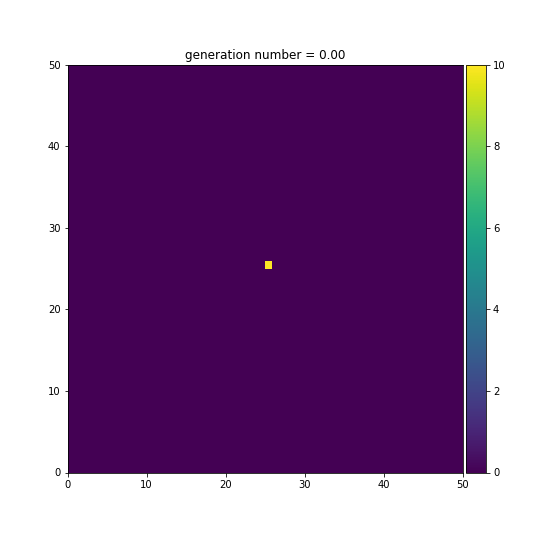
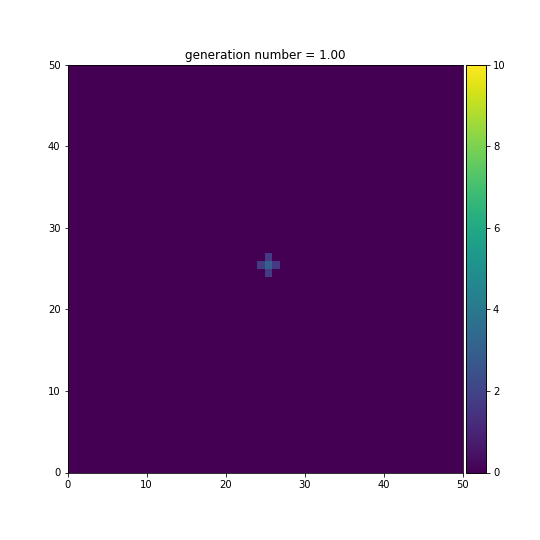
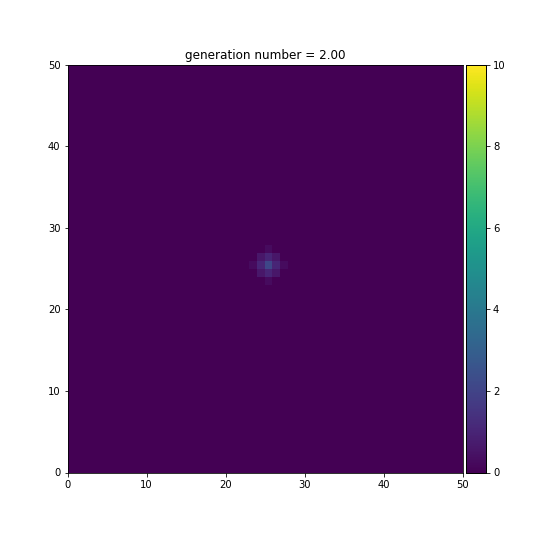
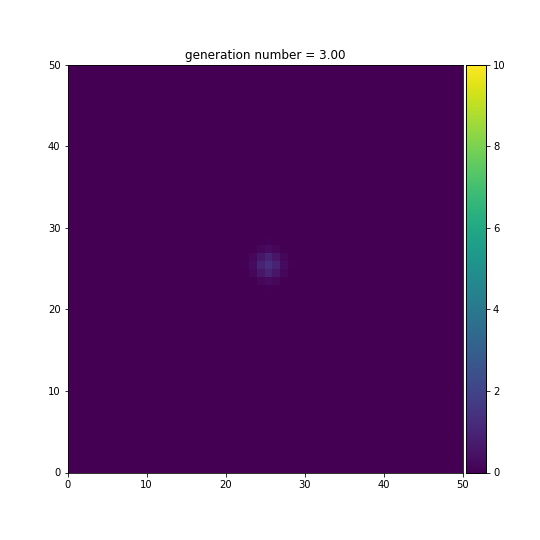
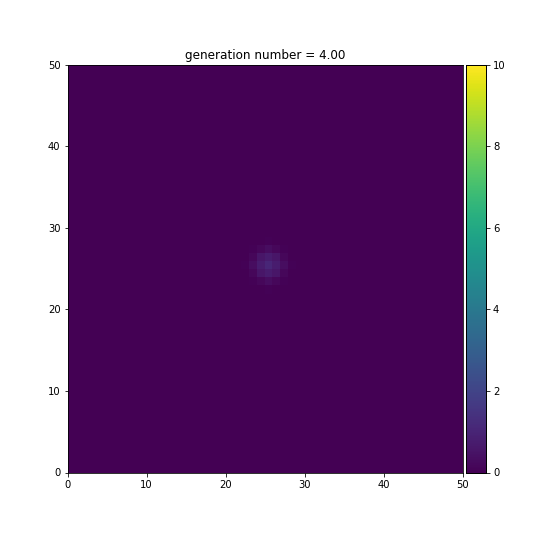
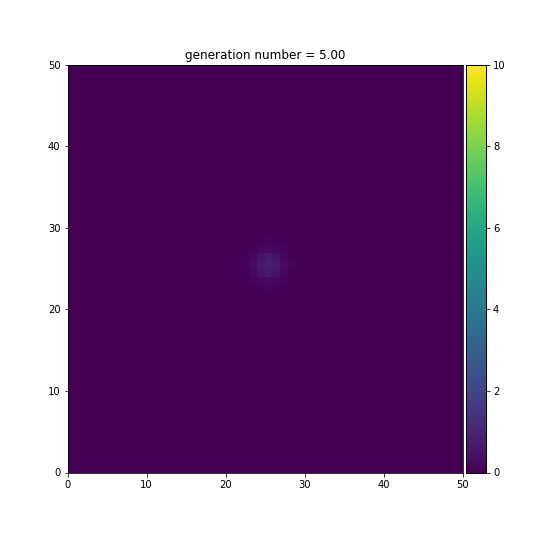
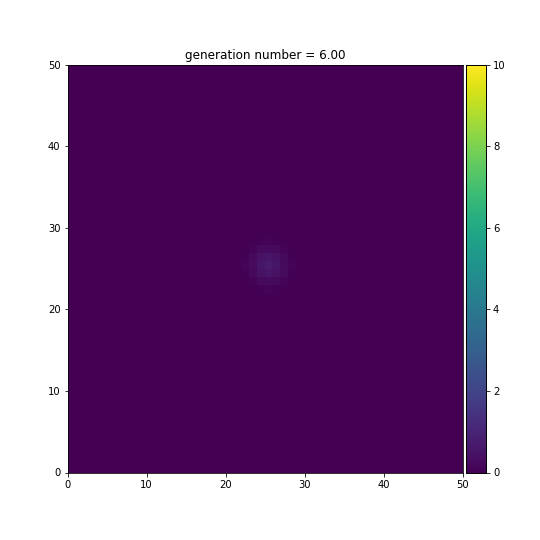
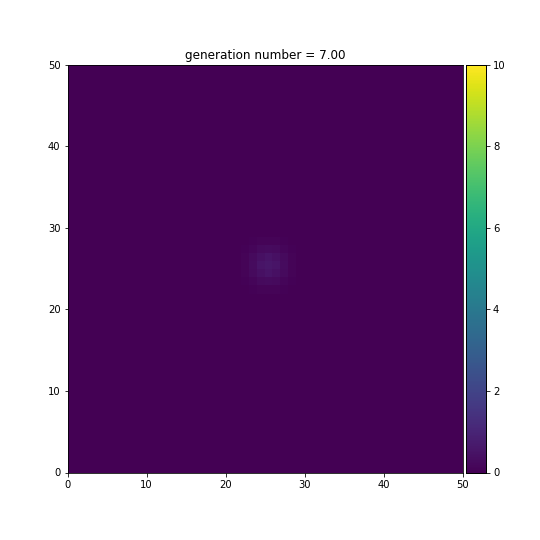
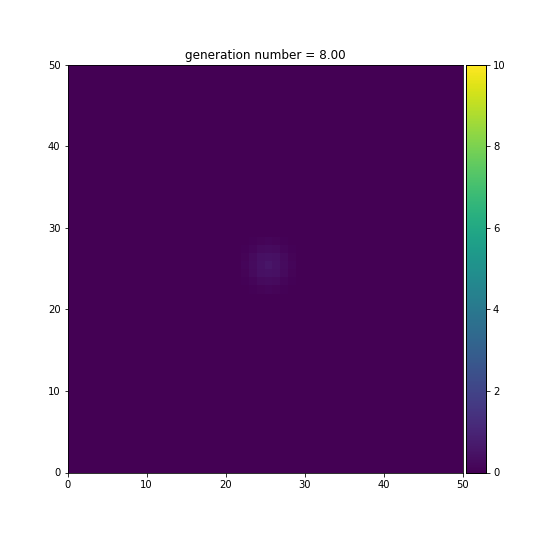
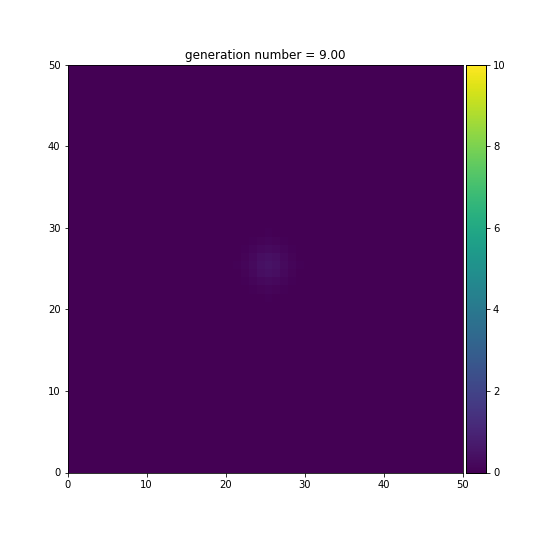
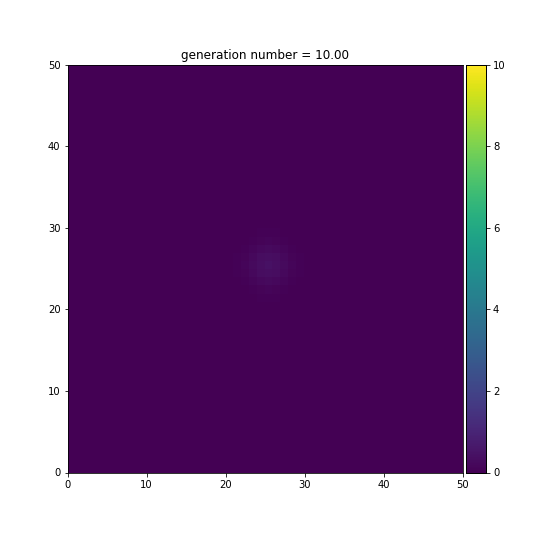
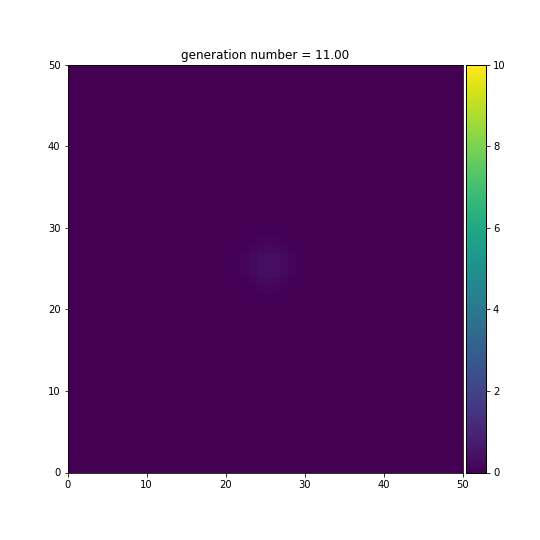
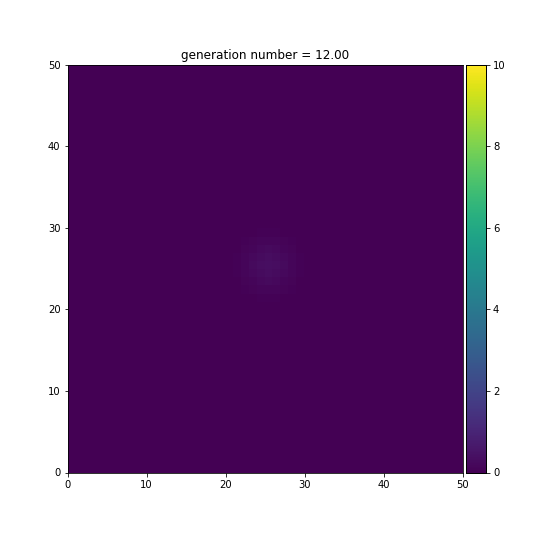
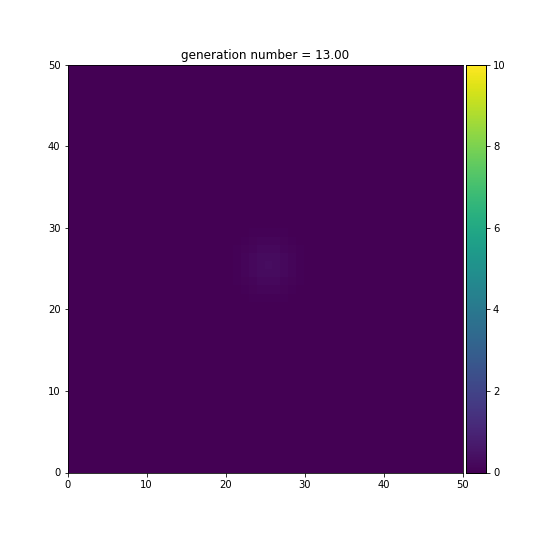
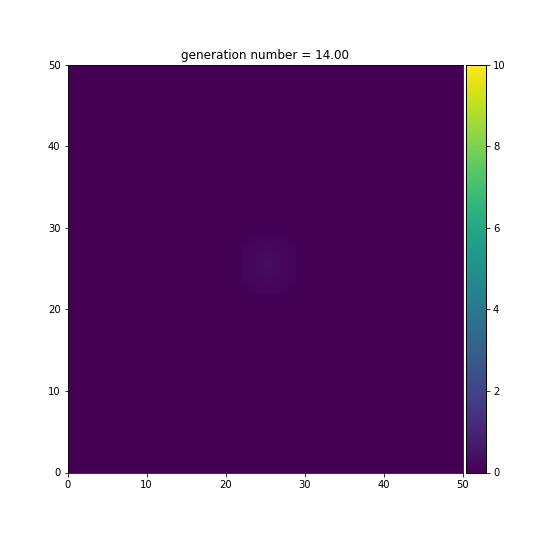
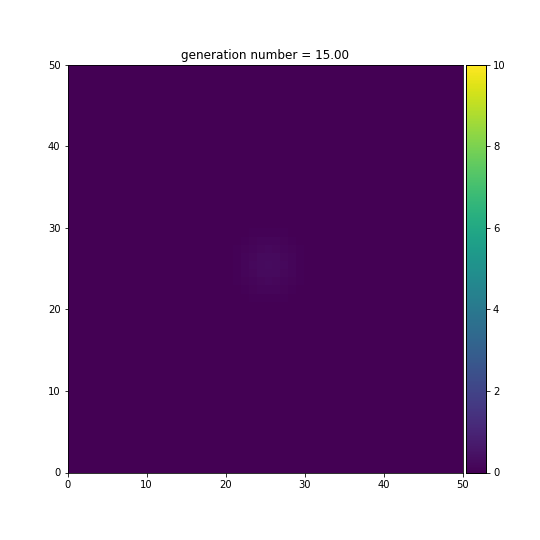
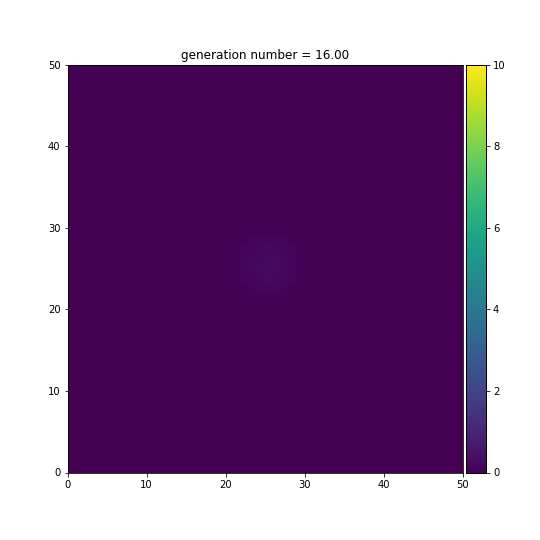
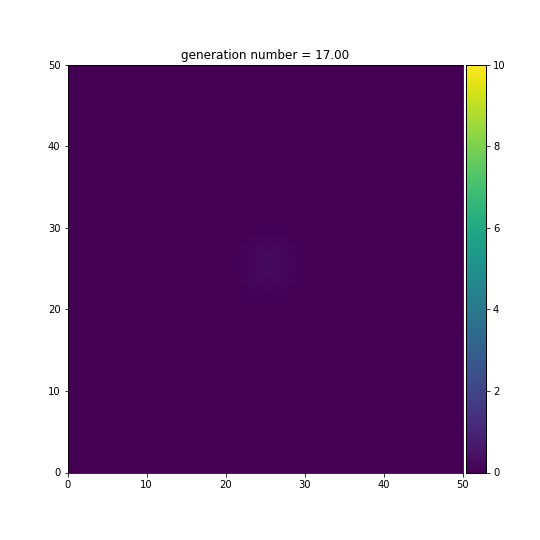
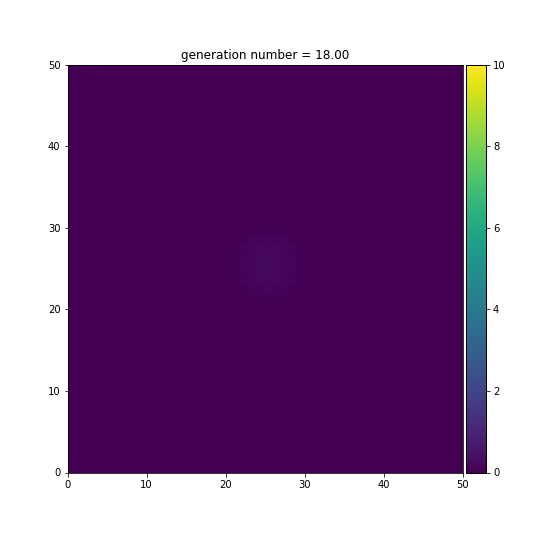
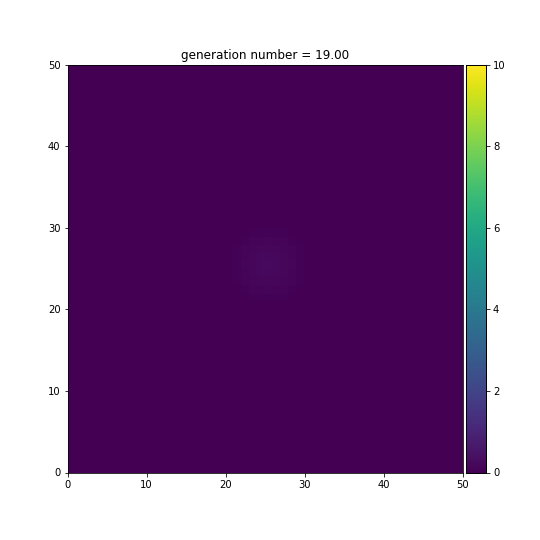
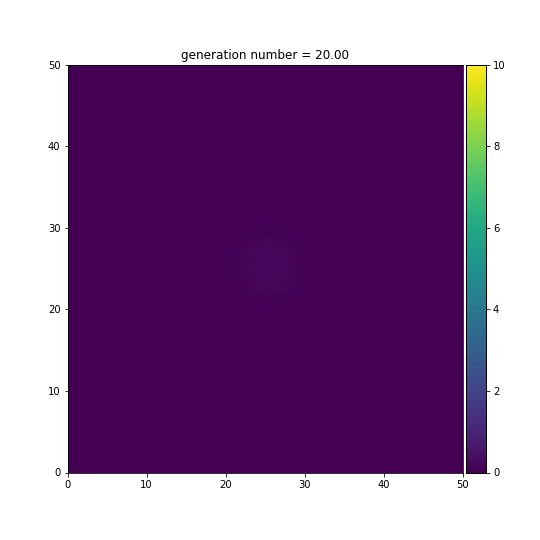
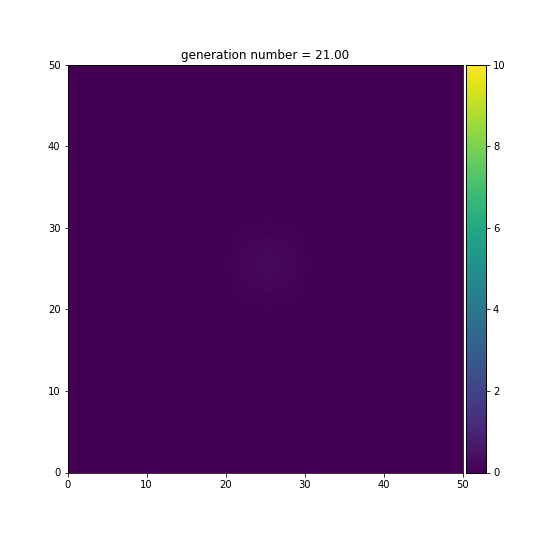
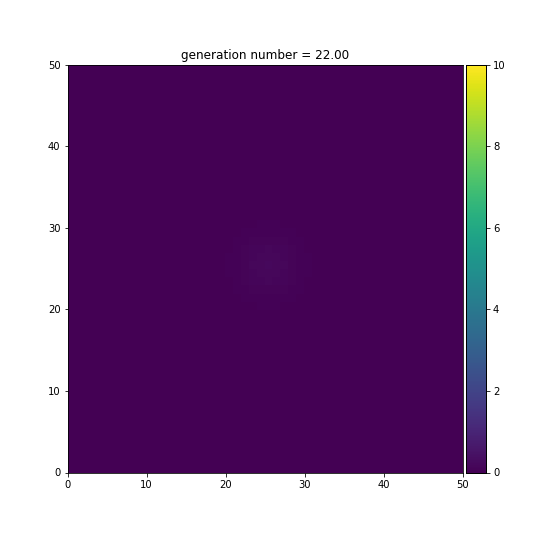
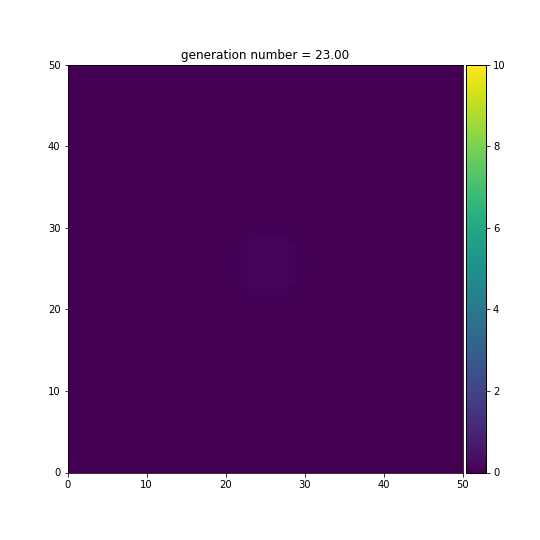
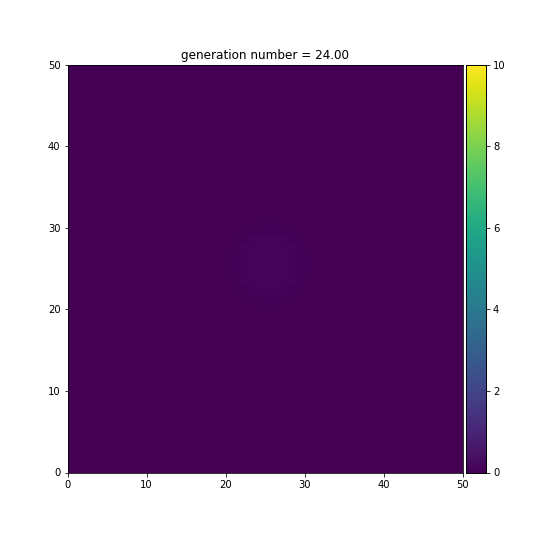
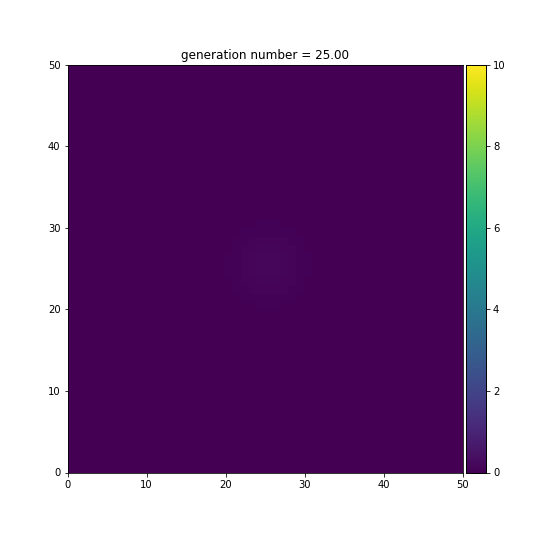
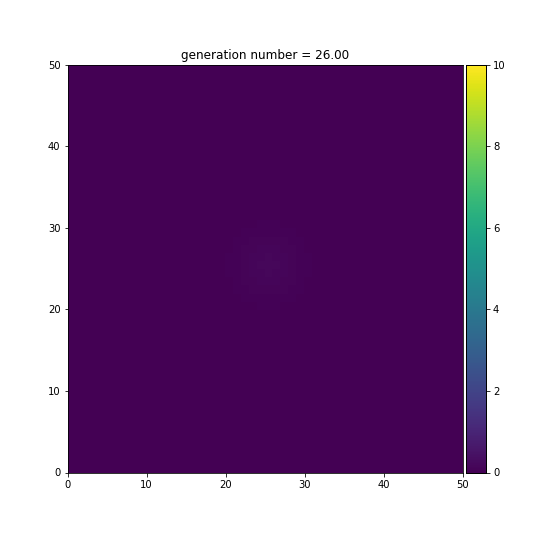
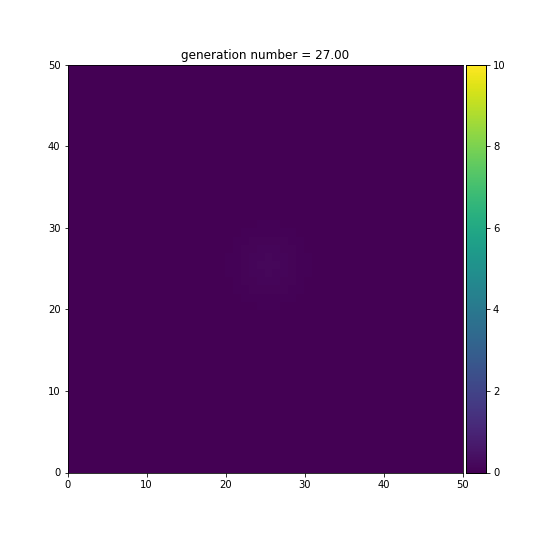
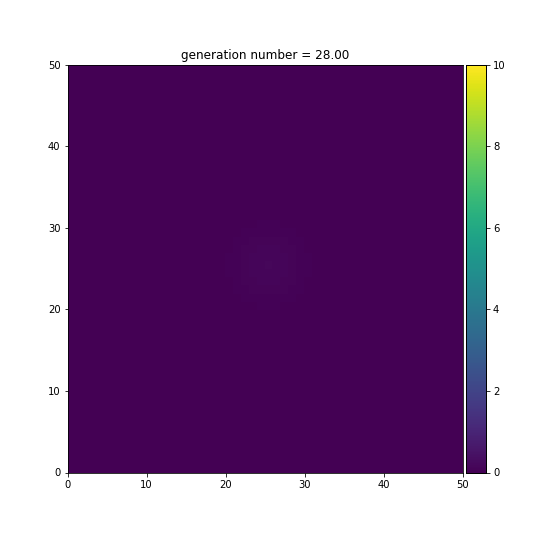
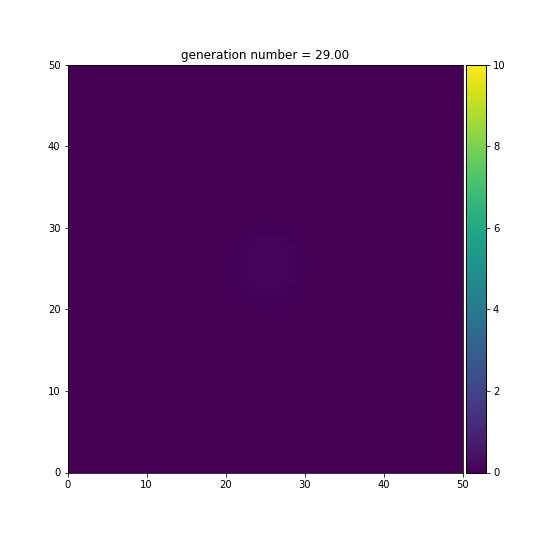
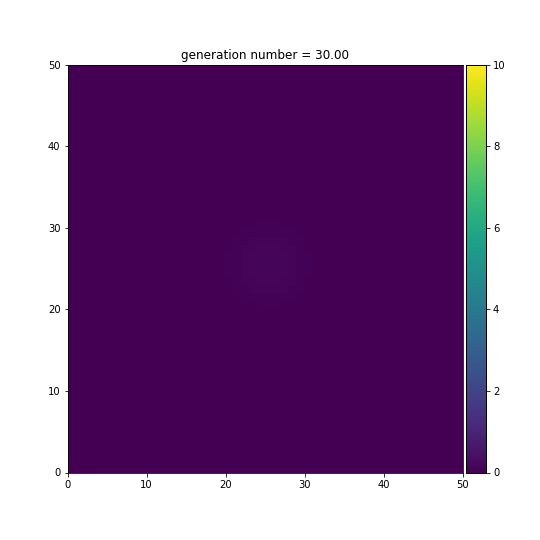
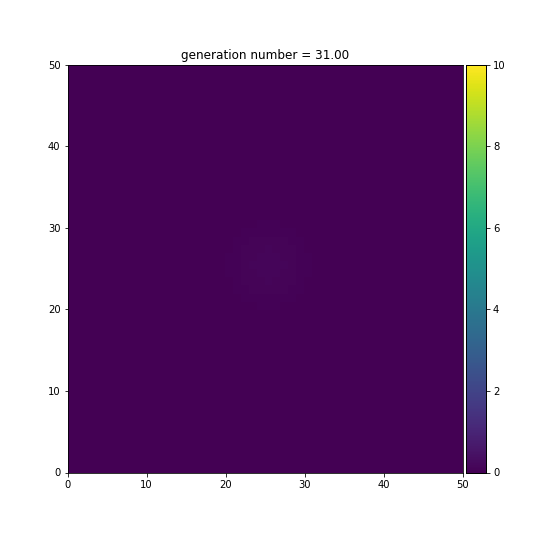
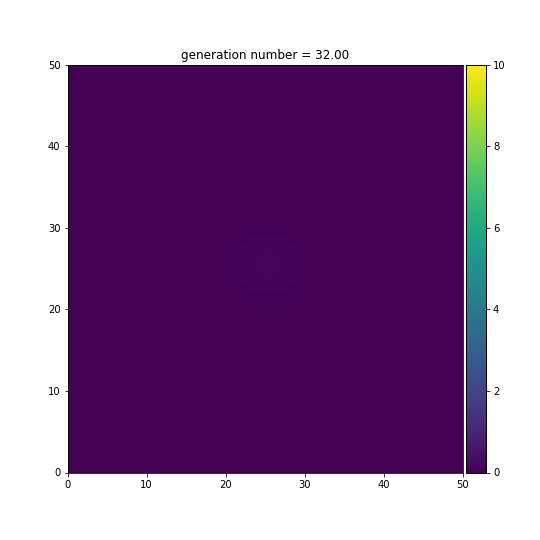
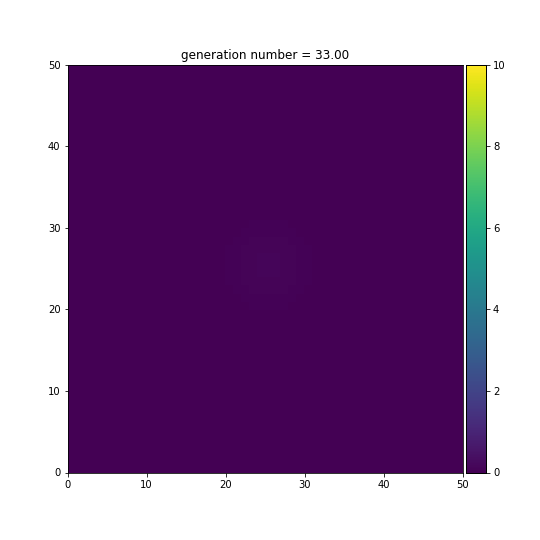
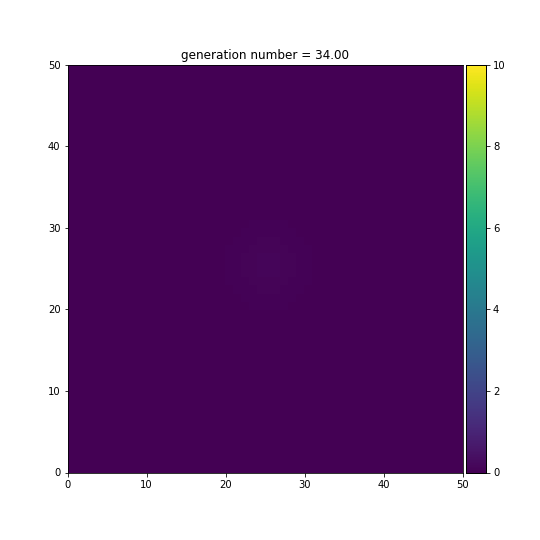
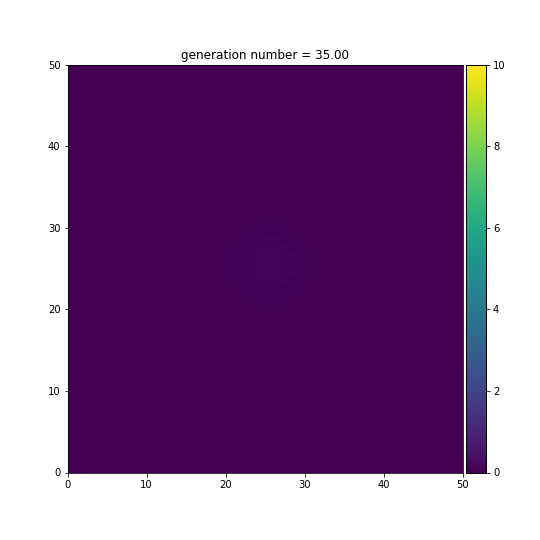
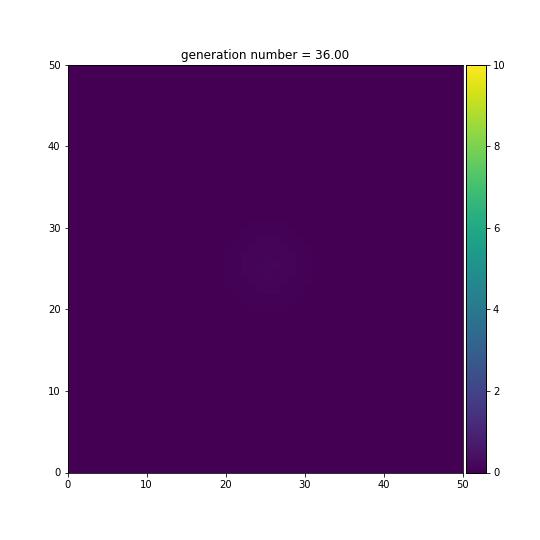
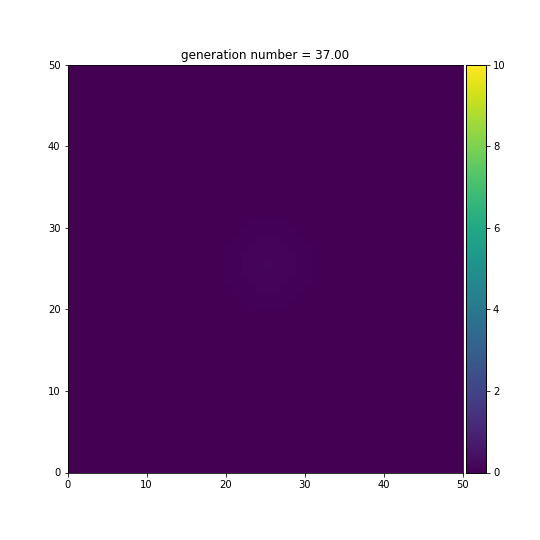
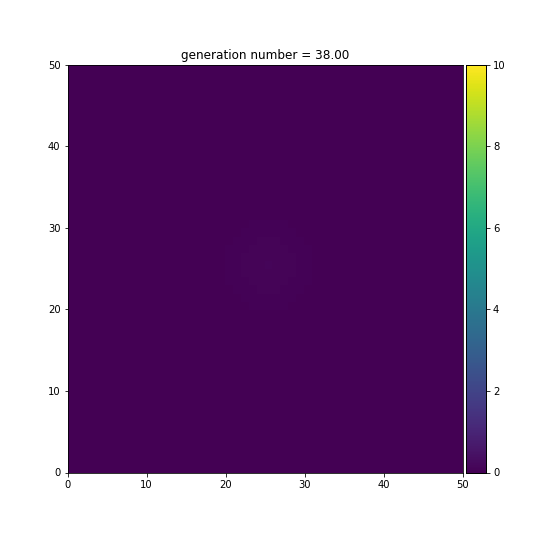
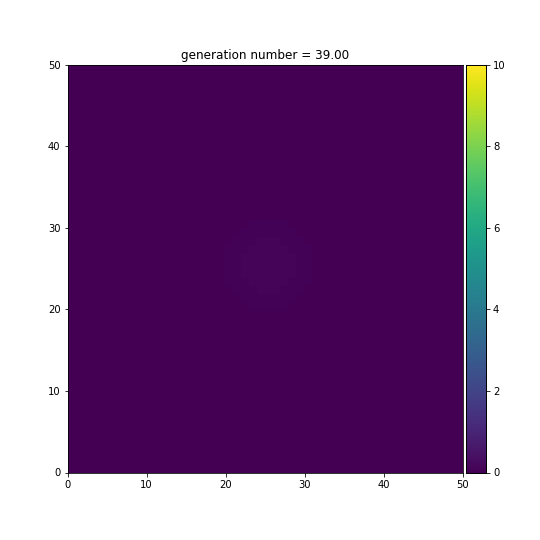
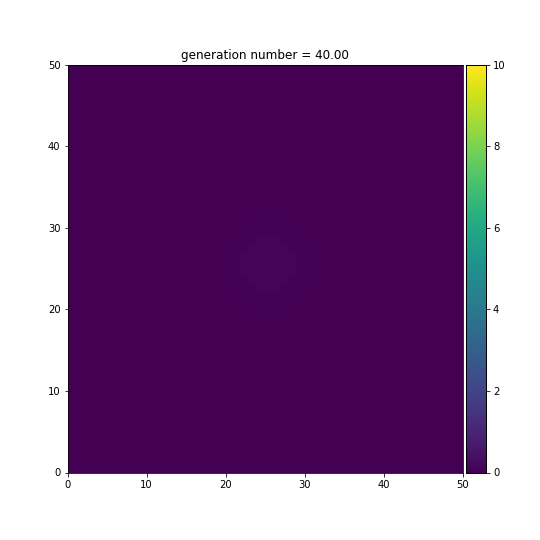
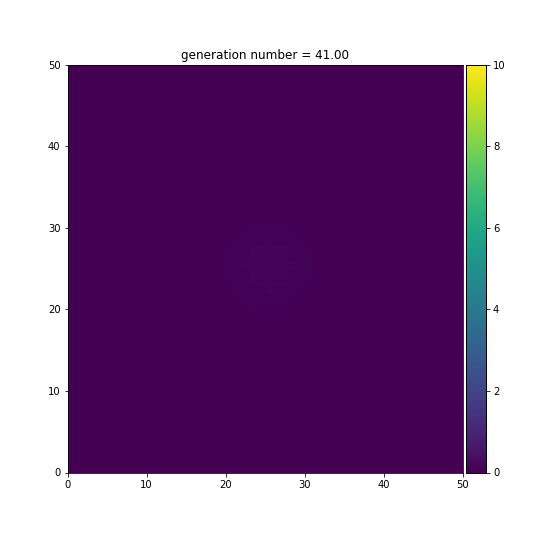
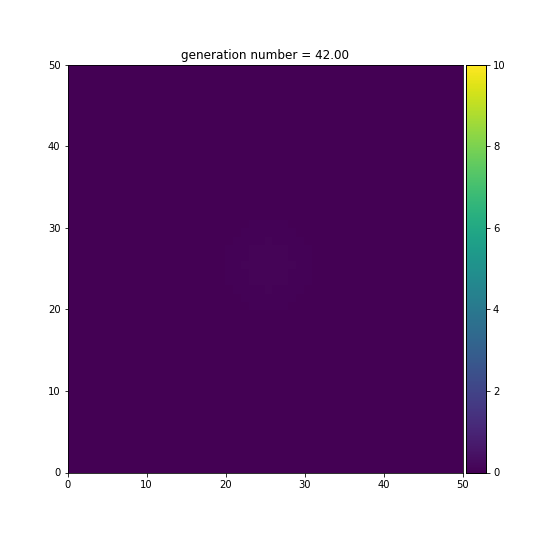
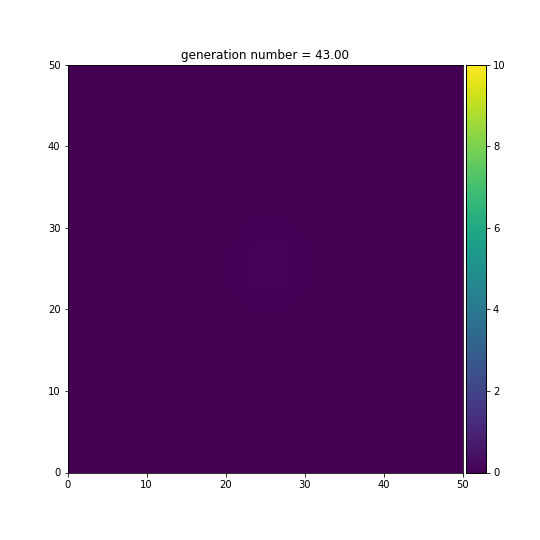
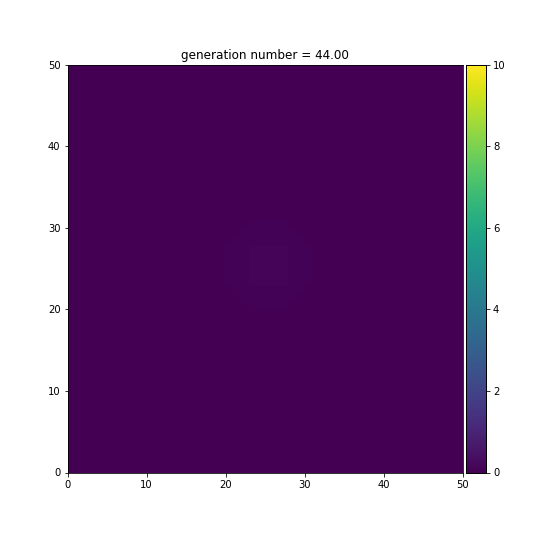
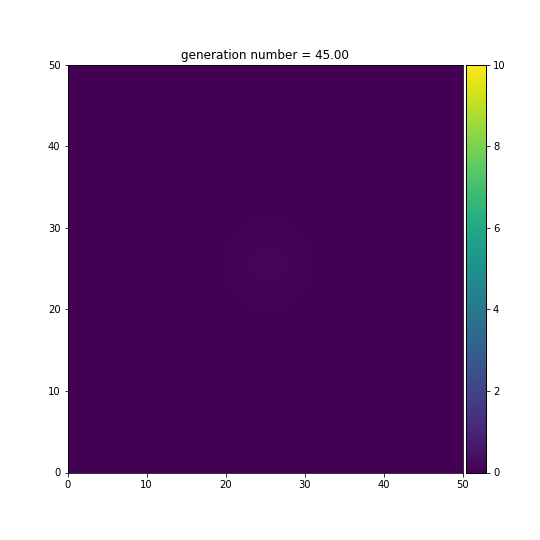
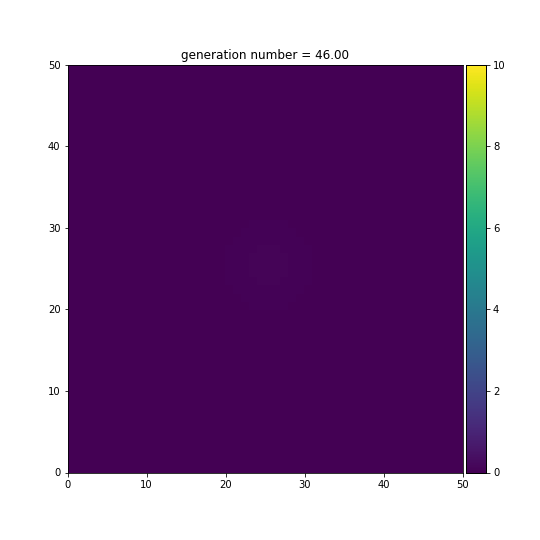
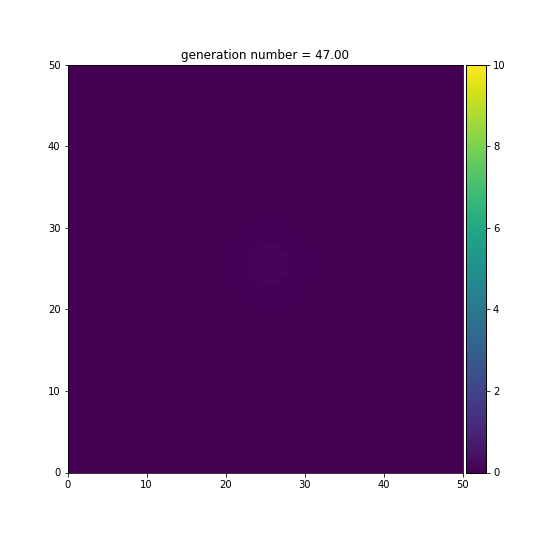
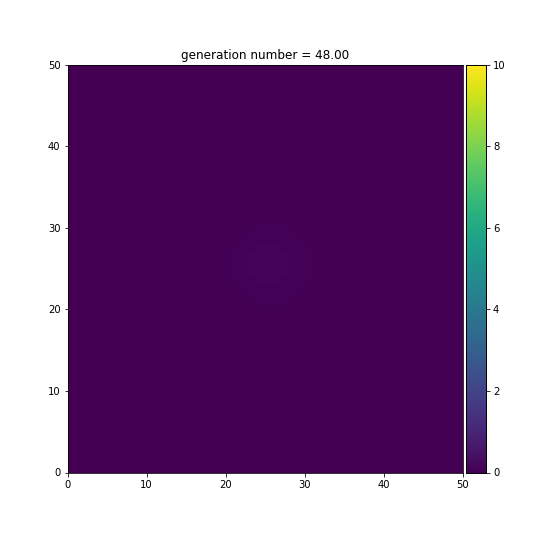
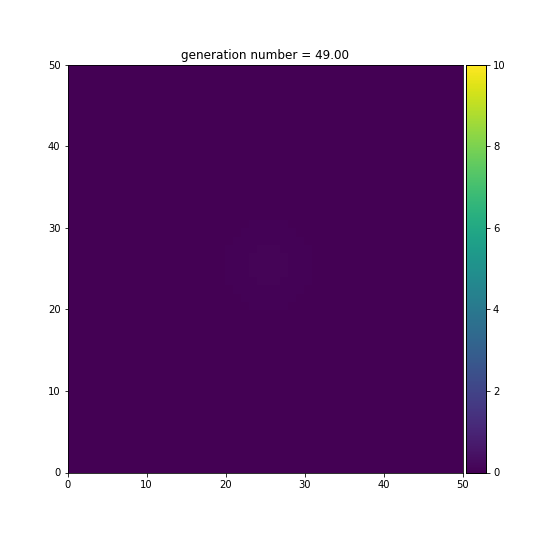

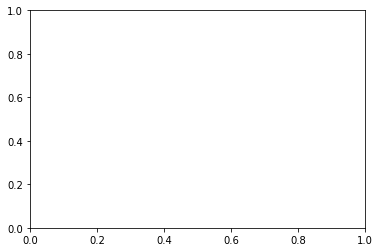

In [49]:
def diffusion_plot_absolute(grid,t):
    
    initial_conc=10
    dt=0.5
    h=1
    
    diff_grid = np.zeros((grid,grid)) #grid with lactate concentrations
    diff_calc = np.zeros((grid,grid)) #grid that stores changes
    
    diff_grid[round(grid/2),round(grid/2)]=initial_conc
    diff_calc[round(grid/2),round(grid/2)]=initial_conc

    
    anim=figure_gif(figsize=(7.5,7.5))
    ax=anim.add_subplot(1,1,1)
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
        
    for i in range(0,round((t)*1/dt)):  
        ax.clear() 
        diff_plot=ax.pcolormesh(diff_grid)
        cb=plt.colorbar(diff_plot, cax=cax, orientation='vertical')
        diff_plot.set_clim(0,10)
        ax.set_title(f'generation number = {i:.2f}')
        anim.add_frame()
        diff_calc = np.zeros((grid,grid))
        diff_calc = diffusion_update(diff_grid,diff_calc,grid,dt,h)
        diff_grid = diff_calc
      
    anim.show()
    
diffusion_plot_absolute(50,25)

In [50]:
def UpdateGrid_v2(M, grid, diff_grid, initial_conc):
    for i in range(grid):
        for j in range(grid):
            if M[i,j] == 1:
                if diff_grid[i,j] < (0.005*initial_conc):
                    M[i,j] = 0
                elif diff_grid[i,j] > (0.005*initial_conc) and diff_grid[i,j] < (0.01*initial_conc):
                    M[i,j] = 1
                elif diff_grid[i,j] > (0.01*initial_conc):
                    if M[i+1,j] == 0:
                        M[i+1,j] = 1
                        continue
                    elif M[i-1,j] == 0:
                        M[i-1,j] = 1
                        continue
                    elif M[i,j+1] == 0:
                        M[i,j+1] = 1
                        continue
                    elif M[i,j-1] == 0:
                        M[i,j-1] = 1
                        continue
            else:
                M[i,j] == 0
                
    return M

In [51]:
def life_v2(grid, ngen,t):
    
    #Setting up initial lactate diffusion conditions and plotting
    
    initial_conc=10
    dt=0.5
    h=1
    
    diff_grid = np.zeros((grid,grid)) #grid with lactate concentrations
    diff_calc = np.zeros((grid,grid)) #grid that stores changes
    
    diff_grid[round(grid/2),round(grid/2)]=initial_conc
    diff_calc[round(grid/2),round(grid/2)]=initial_conc

    
    anim1=figure_gif(figsize=(7.5,7.5))
    ax1=anim1.add_subplot(1,1,1)
    
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='5%', pad=0.05)
        
    for i in range(0,round((t)*1/dt)):  
        ax1.clear() 
        diff_plot=ax1.imshow(diff_grid)
        cb=plt.colorbar(diff_plot, cax=cax, orientation='vertical')
        cb.outline.set_visible(False)
        ax1.set_title(f'Number of timesteps = {i:.2f}')
        anim1.add_frame()
        diff_calc = np.zeros((grid,grid))
        diff_calc = diffusion_update(diff_grid,diff_calc,grid,dt,h)
        diff_grid = diff_calc

    
    #Initialize agent and number of neighbours
    M = np.random.randint(0, 2, (grid,grid))
    nneigh = np.zeros((grid,grid))
    
    anim2=figure_gif(figsize=(15,7.5))
    ax2=anim2.add_subplot(1,1,1)
    
    fig1 = plt.figure(figsize=(12,8))
    ax3=fig1.add_subplot(1,1,1)
    
    cells_per_gen=[]
    t_obs = np.linspace(0,ngen,ngen)

    # loop over the results, drawing results
    # into the figure and saving it as an
    # animation frame
    for i in range(ngen): 
        ax2.clear() 
        ax2.imshow(M, cmap='Greys')
        ax2.set_title(f'generation number = {i:.2f}')
        cells_per_gen.append(np.sum(M))
        ax1.clear() 
        diff_plot=ax1.imshow(diff_grid)
        cb=plt.colorbar(diff_plot, cax=cax, orientation='vertical')
        cb.outline.set_visible(False)
        ax1.set_title(f'Number of timesteps = {i:.2f}')
        anim1.add_frame()
        M = UpdateGrid_v2(M, grid, diff_grid, initial_conc)
        diff_calc = np.zeros((grid,grid))
        diff_calc = diffusion_update(diff_grid,diff_calc,grid,dt,h)
        diff_grid = diff_calc
        anim2.add_frame()

    anim1.show()
    anim2.show()  
    ax3.plot(t_obs,cells_per_gen,'b-',label='Living cells')
    ax2.set_label("Living cells per generation")

In [ ]:
life_v2(50,100,10)